# "Exploratory Data Analysis of Employee Attrition and Organizational Factors"

## Data Description

This dataset provides valuable insights into the employee characteristics of an organization, specifically detailing the following attributes for each employee:

1. **EmployeeID**: A unique identifier assigned to each employee (numeric format).
   
2. **Age**: The age of the employee (numeric value), ranging across various age groups, reflecting the diversity of the workforce.

3. **Gender**: The gender of the employee (categorical variable: Male, Female).

4. **Department**: The department in which the employee works (categorical variable: Marketing, IT, Finance, Sales, etc.), providing insights into workforce distribution across the organization.

5. **EducationLevel**: The highest level of education completed by the employee (numerical scale: 1 for lower levels to 3 for higher education), reflecting the organization's educational diversity.

6. **JobRole**: The role of the employee within the company (categorical variable: Analyst, Manager, Executive, etc.), showcasing job function distribution.

7. **YearsAtCompany**: The number of years the employee has worked at the company (numeric), indicating both employee tenure and potential experience within the organization.

8. **JobSatisfaction**: A score indicating the employee's satisfaction with their job (numeric scale: 1-4), which may help gauge employee morale and engagement.

9. **WorkLifeBalance**: A rating that reflects the employee's balance between work and personal life (numeric scale: 1-4), providing an indication of the company’s work culture.

10. **TrainingTimesLastYear**: The number of training programs the employee attended in the last year (numeric), highlighting the investment in employee development and growth.

11. **Overtime**: Whether the employee worked overtime (categorical variable: Yes, No), which can indicate workload intensity.

12. **PerformanceRating**: The performance rating of the employee (numeric scale: 1-4), reflecting how the company evaluates individual contributions and performance.

13. **Attrition**: Whether the employee has left the company (categorical variable: Yes, No), providing insight into employee retention.

14. **MonthlyIncome**: The monthly income of the employee (numeric), representing financial compensation, which can be analyzed for salary distributions across various job roles and departments.

This data captures a wide range of employee demographics, job characteristics, and performance indicators, enabling detailed analysis for various business insights.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_file():
    try:
        df = pd.read_csv("HR_Analytics_Dataset.csv")
        print("File sucessfully loaded")
        return df
    except FileNotFoundError:
        print("Make sure that you have file in current directory.")
        return None
    except Exception as e:
        print(f"Error : {str(e)}")
        return None

df = load_file()

File sucessfully loaded


# Reading first 5 rows of datasets

In [3]:
df.head()

,EmployeeID,Age,Gender,Department,EducationLevel,JobRole,YearsAtCompany,JobSatisfaction,WorkLifeBalance,TrainingTimesLastYear,Overtime,PerformanceRating,Attrition,MonthlyIncome
0,1,50,Male,Marketing,1,Analyst,17,4,2,9,Yes,3,No,32956
1,2,36,Female,IT,2,Analyst,5,1,2,6,No,3,No,29193
2,3,29,Male,Finance,3,Manager,16,1,2,5,No,4,No,206465
3,4,42,Male,Marketing,1,Specialist,24,3,3,1,No,3,No,32283
4,5,40,Female,Sales,2,Executive,14,3,2,2,No,2,Yes,18136


# Reading last 5 rows of datasets

In [4]:
df.tail()

,EmployeeID,Age,Gender,Department,EducationLevel,JobRole,YearsAtCompany,JobSatisfaction,WorkLifeBalance,TrainingTimesLastYear,Overtime,PerformanceRating,Attrition,MonthlyIncome
4995,4996,45,Male,Finance,1,Specialist,12,2,3,0,No,3,No,29354
4996,4997,37,Male,Sales,2,Specialist,11,2,4,6,Yes,3,No,34101
4997,4998,34,Male,Marketing,3,Clerk,21,4,2,0,No,2,No,15071
4998,4999,46,Female,IT,2,Specialist,8,2,2,6,No,1,No,11931
4999,5000,25,Male,Finance,3,Analyst,26,4,2,8,Yes,3,No,35878


# Getting information about datasets

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   EmployeeID             5000 non-null   int64 
 1   Age                    5000 non-null   int64 
 2   Gender                 5000 non-null   object
 3   Department             5000 non-null   object
 4   EducationLevel         5000 non-null   int64 
 5   JobRole                5000 non-null   object
 6   YearsAtCompany         5000 non-null   int64 
 7   JobSatisfaction        5000 non-null   int64 
 8   WorkLifeBalance        5000 non-null   int64 
 9   TrainingTimesLastYear  5000 non-null   int64 
 10  Overtime               5000 non-null   object
 11  PerformanceRating      5000 non-null   int64 
 12  Attrition              5000 non-null   object
 13  MonthlyIncome          5000 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 547.0+ KB


#### Observation :
#### The study founds that there are all together 14 columns in the datasets with 9 integers data type and 5 object data type column.

# Checking null values in the dataset

In [6]:
df.isnull().sum()

EmployeeID               0
Age                      0
Gender                   0
Department               0
EducationLevel           0
JobRole                  0
YearsAtCompany           0
JobSatisfaction          0
WorkLifeBalance          0
TrainingTimesLastYear    0
Overtime                 0
PerformanceRating        0
Attrition                0
MonthlyIncome            0
dtype: int64

# Findings :
## The study founds that there are no null value in any column of the datasets. Incase if there was missing value or null value, we should handle with the following command:
##  -->  df.fillna(df.mean(numeric_only=True))

# Checking duplicate values in the dataset

In [7]:
df.duplicated().sum()

np.int64(0)

##### Findings :
The study founds that there are no duplicates value in the datasets.

# "Dropping irrelevant columns."

In [8]:
df = df.drop(columns=["EmployeeID"])

# Checking basic statistics of the numerical data

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,40.6998,10.927249,22.0,31.0,41.0,50.00,59.0
EducationLevel,5000.0,2.1394,0.789489,1.0,2.0,2.0,3.00,4.0
YearsAtCompany,5000.0,15.6076,8.587058,1.0,8.0,16.0,23.00,30.0
JobSatisfaction,5000.0,2.4816,1.011863,1.0,2.0,2.0,3.00,4.0
WorkLifeBalance,5000.0,2.5058,0.803054,1.0,2.0,3.0,3.00,4.0
TrainingTimesLastYear,5000.0,4.4994,2.876535,0.0,2.0,5.0,7.00,9.0
PerformanceRating,5000.0,2.8360,0.799270,1.0,2.0,3.0,3.00,4.0
MonthlyIncome,5000.0,64281.7628,69172.445125,3314.0,20653.5,34024.5,64399.25,279971.0


# Key Insights 🚀
##### Age: Avg. 41 years (Range: 22–59).
##### Experience: Employees stay for 16 years (Min: 1, Max: 30).
##### Education: Most have level 2 (likely bachelor's).
##### Job Satisfaction & Work-Life Balance: Moderate (~2.5/4).
##### Training: Avg. 5 sessions/year (Range: 0–9).
##### Performance: Mostly rated 2–3 (Avg. 3).
##### Salary: Huge gap! 💰 Avg. $34K, but ranges from $3K to $280K.

# Checking Data types of datasets

In [10]:
df.dtypes

Age                       int64
Gender                   object
Department               object
EducationLevel            int64
JobRole                  object
YearsAtCompany            int64
JobSatisfaction           int64
WorkLifeBalance           int64
TrainingTimesLastYear     int64
Overtime                 object
PerformanceRating         int64
Attrition                object
MonthlyIncome             int64
dtype: object

# Checking how many males and females are there in datasets.

In [11]:
gender_count = df['Gender'].value_counts()
gender_count

Gender
Male      2574
Female    2426
Name: count, dtype: int64

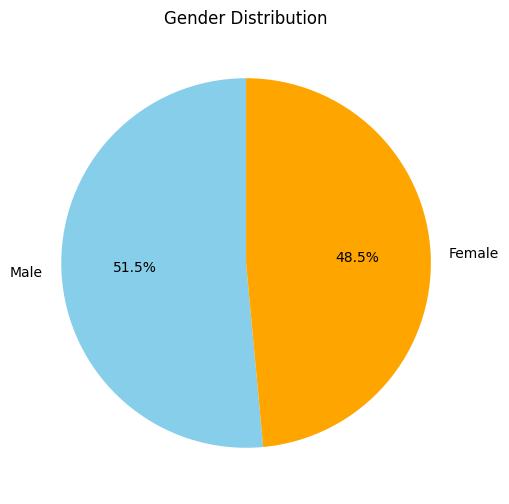

In [12]:
plt.figure(figsize=(6, 6))
gender_count.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'orange'], startangle=90)
plt.title('Gender Distribution')
plt.ylabel('')  # Hides the y-label for cleaner look
plt.show()

# Observations:
   ### There are total 2574 (51.5 %) males out of 5000 employees in the datasets.
   ### There are total 2426 (48.5%) females out of 5000 employees in the datasets.

# Checking no. of employess department wise.

In [13]:
df["Department"].value_counts()

Department
Sales        1038
Finance      1022
Marketing    1008
HR            988
IT            944
Name: count, dtype: int64

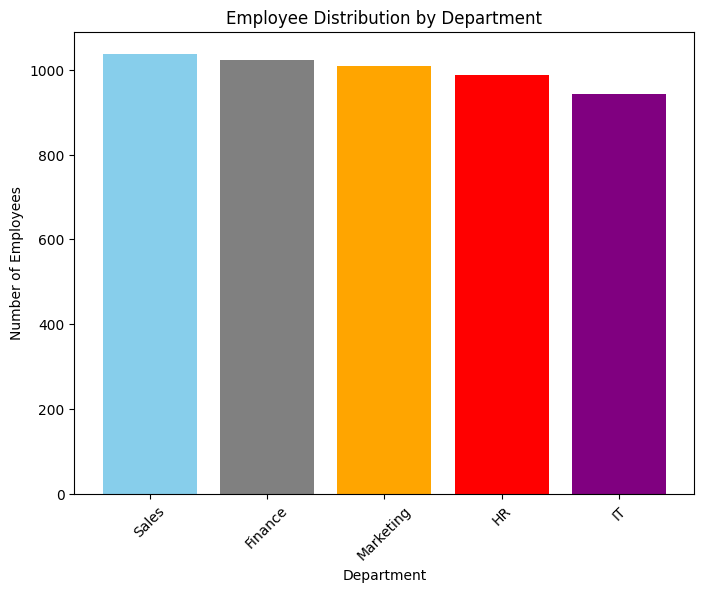

In [14]:
departments = ['Sales', 'Finance', 'Marketing', 'HR', 'IT']
employee_count = [1038, 1022, 1008, 988, 944]


plt.figure(figsize=(8, 6))
plt.bar(departments, employee_count, color=['skyblue', 'gray', 'orange', 'red', 'purple'])
plt.title('Employee Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

# Observation:
### The Sales department has the highest number of employees, with 1038 employees.
### The Finance department follows closely with 1022 employees.
### The Marketing department has 1008 employees.
### The HR department has 988 employees.
### The IT department has the fewest employees, with 944 employees.
## The bar plot clearly shows the relative distribution of employees across each department, with Sales leading and IT having the lowest count.

In [15]:
df["EducationLevel"].value_counts()

EducationLevel
2    2555
3    1187
1    1002
4     256
Name: count, dtype: int64

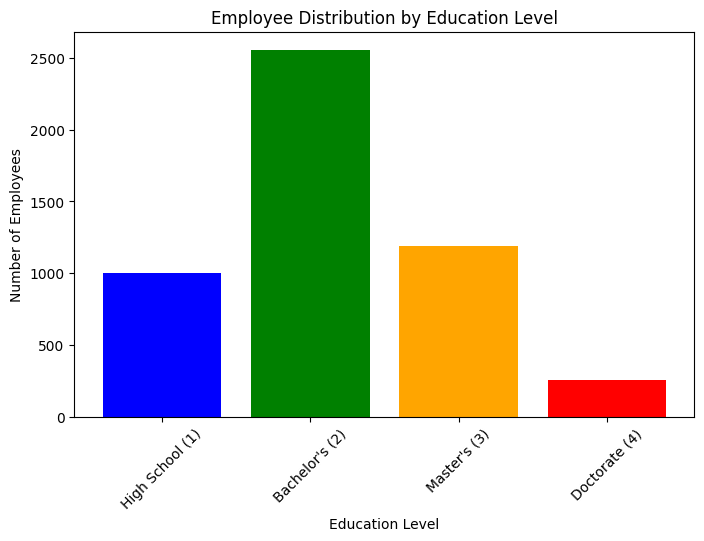

In [16]:
education_levels = ['High School (1)', "Bachelor's (2)", "Master's (3)", 'Doctorate (4)']
employee_count = [1002, 2555, 1187, 256]

# Plotting Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(education_levels, employee_count, color=['blue', 'green', 'orange', 'red'])
plt.title('Employee Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

# Observation
#### The Education Level likely represents different stages of education, typically coded as:

#### Level 1 → High School -> 1,002 employees
#### Level 2 → Bachelor's Degree -> 2555 employees
#### Level 3 → Master's Degree -> 1187 employees
#### Level 4 → Doctorate (PhD) -> 256 employees

#### In this data, most employees have Level 2 (Bachelor's), while fewer have a PhD (Level 4)

In [17]:
df["JobRole"].value_counts()

JobRole
Executive     1077
Clerk         1056
Manager        973
Specialist     960
Analyst        934
Name: count, dtype: int64

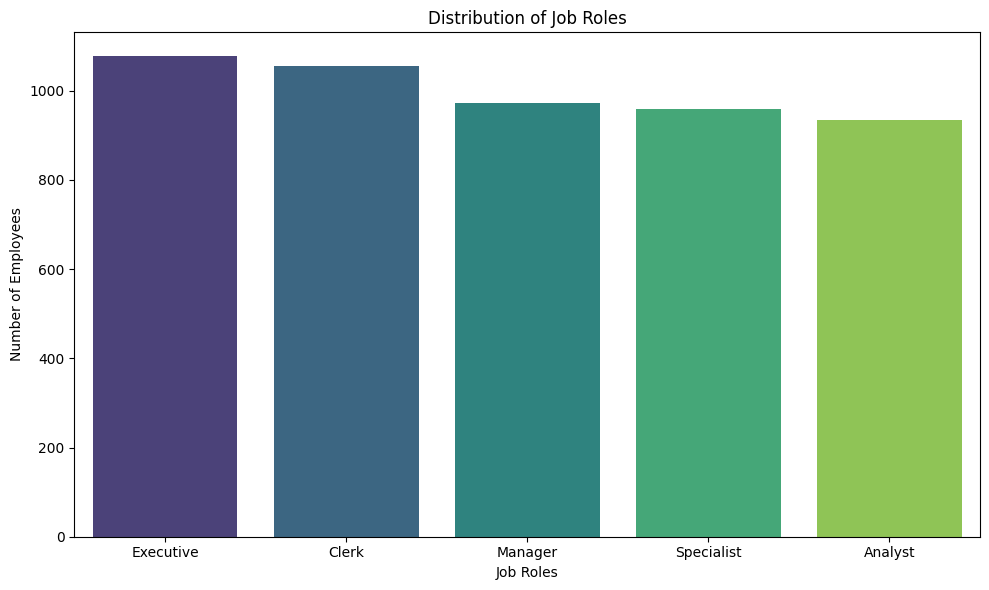

In [18]:
job_role_counts = df['JobRole'].value_counts().reset_index()
job_role_counts.columns = ['JobRole', 'Count']

# Plot using Seaborn with adjusted figure size
plt.figure(figsize=(10, 6))  # Adjusted size for better fit on screen
sns.barplot(x="JobRole", y="Count", data=job_role_counts, hue="JobRole", palette="viridis")

# Labels and title
plt.xlabel("Job Roles")
plt.ylabel("Number of Employees")
plt.title("Distribution of Job Roles")
plt.tight_layout()  # Ensures everything fits without overlapping

# Show plot
plt.show()

# Observation
 
### The Bar-plot of JobRole column of dataset shows the distribution of employees across different job positions:

### Executive → 1,077 employees (Most common role)
### Clerk → 1,056 employees
### Manager → 973 employees
### Specialist → 960 employees 
### Analyst → 934 employees (Least common of the four)

### This means the company has more Executives and Clerks, while Managers Specialists and Analyst are slightly fewer.

In [19]:
df["JobSatisfaction"].value_counts()

JobSatisfaction
2    1554
3    1511
1     991
4     944
Name: count, dtype: int64

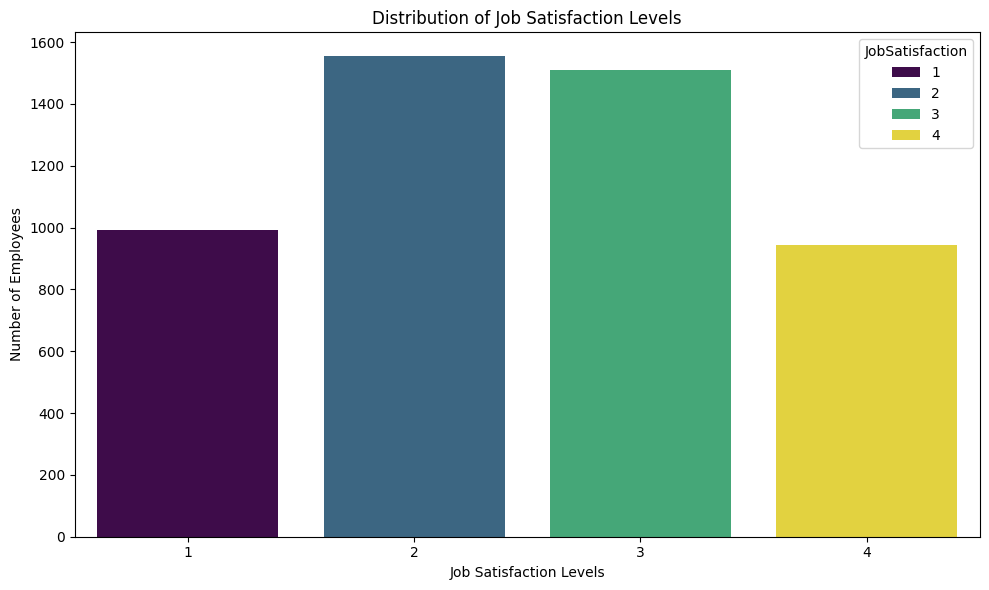

In [20]:
satisfaction_counts = df['JobSatisfaction'].value_counts().reset_index()
satisfaction_counts.columns = ['JobSatisfaction', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x="JobSatisfaction", y="Count", data=satisfaction_counts, hue="JobSatisfaction",  palette="viridis")

# Labels and title
plt.xlabel("Job Satisfaction Levels")
plt.ylabel("Number of Employees")
plt.title("Distribution of Job Satisfaction Levels")
plt.tight_layout()
plt.show()

# Observations:
## The following bar plot represents the job satisfaction levels of employees, likely coded as follows:

#### Level 1 → 991 employees (Least satisfied)
#### Level 2 → 1,554 employees (Moderately satisfied)
#### Level 3 → 1,511 employees (Fairly satisfied)
#### Level 4 → 944 employees (Most satisfied)

#### This shows that most employees are moderately satisfied (Level 2) or fairly satisfied (Level 3), with fewer employees reporting being very satisfied (Level 4) or least satisfied (Level 1).
#### This suggests that overall, employees are mostly happy, with most being in the middle satisfaction levels.

In [21]:
df["WorkLifeBalance"].value_counts()

WorkLifeBalance
2    2009
3    2004
4     504
1     483
Name: count, dtype: int64

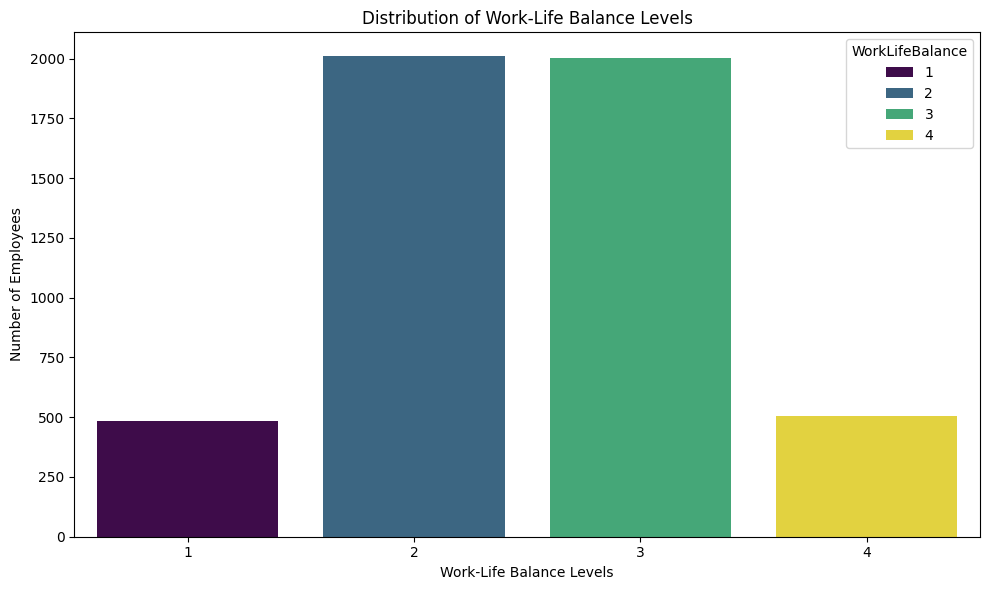

In [22]:
work_life_balance_counts = df['WorkLifeBalance'].value_counts().reset_index()
work_life_balance_counts.columns = ['WorkLifeBalance', 'Count']

# Plot the distribution of work-life balance
plt.figure(figsize=(10, 6))
sns.barplot(x="WorkLifeBalance", y="Count", data=work_life_balance_counts, hue="WorkLifeBalance", palette="viridis")

# Labels and title
plt.xlabel("Work-Life Balance Levels")
plt.ylabel("Number of Employees")
plt.title("Distribution of Work-Life Balance Levels")

# Show plot
plt.tight_layout()
plt.show()

# Work-Life Balance Distribution
# Observations:
### Majority of employees (2009) rate their work-life balance as 2 (below average), indicating room for improvement.
### 2004 employees rate it as 3 (neutral), reflecting a middle ground where balance is neither great nor poor.
### 504 employees rate their work-life balance as 4 (good), suggesting a positive perception of their balance.
### 483 employees rate it as 1 (very poor), indicating significant dissatisfaction with their current work-life balance.
# Key Insight:
## Most employees perceive their work-life balance as below average or neutral. Only a small portion of employees report a good balance, while others experience very poor work-life balance.

# Conclusion:
## Improving work-life balance across the organization could significantly boost employee satisfaction and enhance overall productivity.

In [23]:
df["Overtime"].value_counts()

Overtime
No     3479
Yes    1521
Name: count, dtype: int64

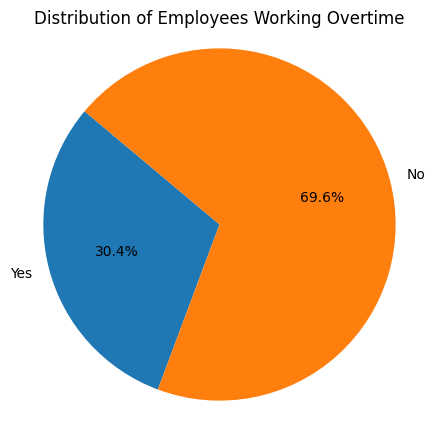

In [24]:
# Pie chart for Overtime distribution
overtime_counts = {'Yes': 1521, 'No': 3479}
plt.figure(figsize=(5, 5))
plt.pie(overtime_counts.values(), labels=overtime_counts.keys(), autopct='%1.1f%%', startangle=140, colors=["#1f77b4", "#ff7f0e"])

# Title
plt.title("Distribution of Employees Working Overtime")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

# Overtime Distribution
# Observations:
### 3479 employees (69.6 %) reported No to working overtime, indicating that the majority do not regularly work beyond their scheduled hours.
### 1521 employees (30.4 %) reported Yes to working overtime, suggesting that a significant portion of employees frequently work extra hours.
# Key Insight:
## Most employees don’t work overtime, but a significant number do, which could affect their work-life balance and well-being.
# Conclusion:
## Organizations should monitor overtime trends and consider offering support or adjustments to ensure a healthy work-life balance for employees, especially those who frequently work overtime.

In [25]:
df["PerformanceRating"].value_counts()

PerformanceRating
3    2437
2    1309
4     999
1     255
Name: count, dtype: int64

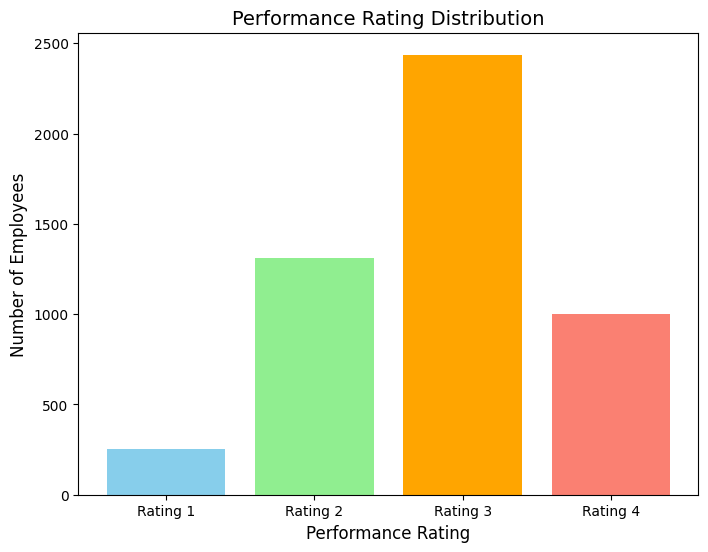

In [26]:
ratings = [1, 2, 3, 4]
counts = [255, 1309, 2437, 999]

rating_labels = ['Rating 1', 'Rating 2', 'Rating 3', 'Rating 4']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(rating_labels, counts, color=['skyblue', 'lightgreen', 'orange', 'salmon'])
plt.title('Performance Rating Distribution', fontsize=14)
plt.xlabel('Performance Rating', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)
plt.show()

# Observations:
 ## The PerformanceRating distribution reflects the overall performance of employees:

  ### Rating 1: 255 employees – Few struggling with poor performance, highlighting areas for support.
  ### Rating 2: 1,309 employees – Fair number performing below average, indicating room for improvement.
  ### Rating 3: 2,437 employees – Majority performing at a good level, meeting expectations.
  ### Rating 4: 999 employees – Smaller group excelling with excellent performance, going above expectations.

## Conclusions:
  ### Most employees are performing well, though there is an opportunity to enhance performance, especially for those with lower ratings.

In [27]:
df["Attrition"].value_counts()

Attrition
No     4017
Yes     983
Name: count, dtype: int64

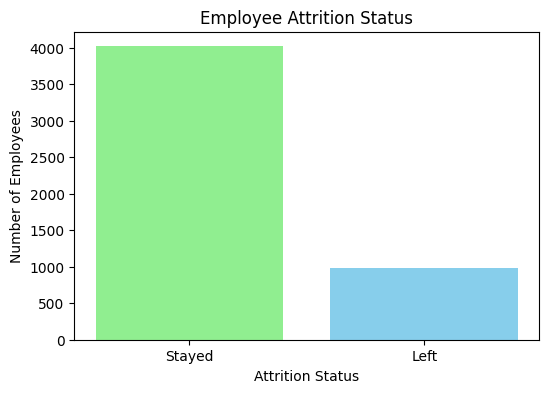

In [28]:
attrition_status = ['Stayed', 'Left']
employee_count = [4017, 983]

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(attrition_status, employee_count, color=['lightgreen', 'skyblue'])
plt.title('Employee Attrition Status')
plt.xlabel('Attrition Status')
plt.ylabel('Number of Employees')
plt.show()

# Observation:
   ### 4017 Employees (No): A strong majority of employees are staying with the company, reflecting a stable workforce.
   ### 983 Employees (Yes): A smaller group has left the company, which may signal areas to explore further in terms of employee satisfaction and retention.

# Conclusions:
   ## Most employees stay with the company, but the attrition of 983 employees suggests the need to investigate and address retention factors for improved stability.

# "Average Monthly Income and Experience (Years at Company) by Job Role 💹 "

In [29]:
df.groupby("JobRole")[["MonthlyIncome", "YearsAtCompany"]].mean()


,MonthlyIncome,YearsAtCompany
JobRole,,
Analyst,32661.025696,15.588865
Clerk,31272.561553,15.784091
Executive,108059.502321,15.607242
Manager,112356.373073,15.757451
Specialist,33517.454167,15.280208


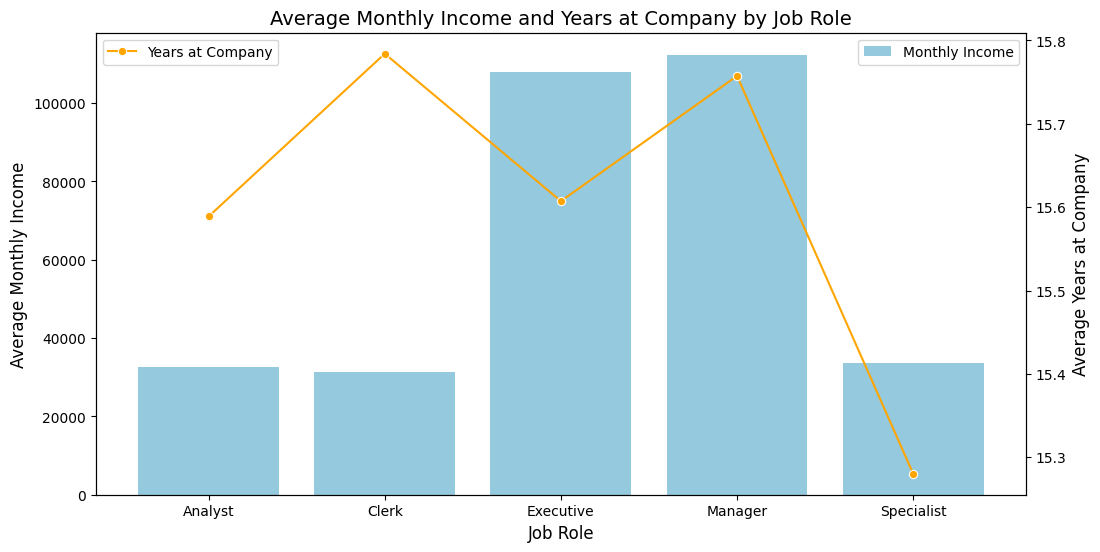

In [30]:
# Grouping by JobRole and aggregating MonthlyIncome and YearsAtCompany
agg_data = df.groupby("JobRole")[["MonthlyIncome", "YearsAtCompany"]].mean().reset_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for MonthlyIncome
sns.barplot(x="JobRole", y="MonthlyIncome", data=agg_data, ax=ax1, color="skyblue", label="Monthly Income")

# Twin axis for YearsAtCompany
ax2 = ax1.twinx()
sns.lineplot(x="JobRole", y="YearsAtCompany", data=agg_data, ax=ax2, color="orange", marker="o", label="Years at Company")

# Labels and titles
ax1.set_xlabel("Job Role", fontsize=12)
ax1.set_ylabel("Average Monthly Income", fontsize=12)
ax2.set_ylabel("Average Years at Company", fontsize=12)
ax1.set_title("Average Monthly Income and Years at Company by Job Role", fontsize=14)

plt.xticks(rotation=45)
plt.legend(loc="upper left")
plt.show()


# "Income and Experience Comparison by Job Role"
## Observations:
   ### This analysis compares the average Monthly Income and Years at Company across different job roles:
   ### Executives and Managers have significantly higher monthly incomes ($108K and $112K) compared to other roles, while their years at the company are relatively similar to Analysts and Clerks (around 15-16 years).
   ### Analysts, Clerks, and Specialists have lower salaries (ranging from $31K to $33K) but share similar levels of experience, typically around 15 years.
   ### The grouped bar chart highlights the stark difference in income while showing the consistency in tenure across all roles.
## Conclusions:
   ### The analysis reveals that Executives and Managers earn significantly higher salaries than Analysts, Clerks, and Specialists, yet all roles have similar years of experience, indicating that compensation is more influenced by job responsibility than tenure.

In [31]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()
df['Attrition'] = label_encoder.fit_transform(df['Attrition'])
df['Attrition'].value_counts()

Attrition
0    4017
1     983
Name: count, dtype: int64

# Observation:
## Here, "Yes" was encoded as 1 and 
## "No" was encoded as 0

### 0 represents employees who did not leave the company (4017 employees).
### 1 represents employees who left the company (983 employees).

# Correlation Matrix

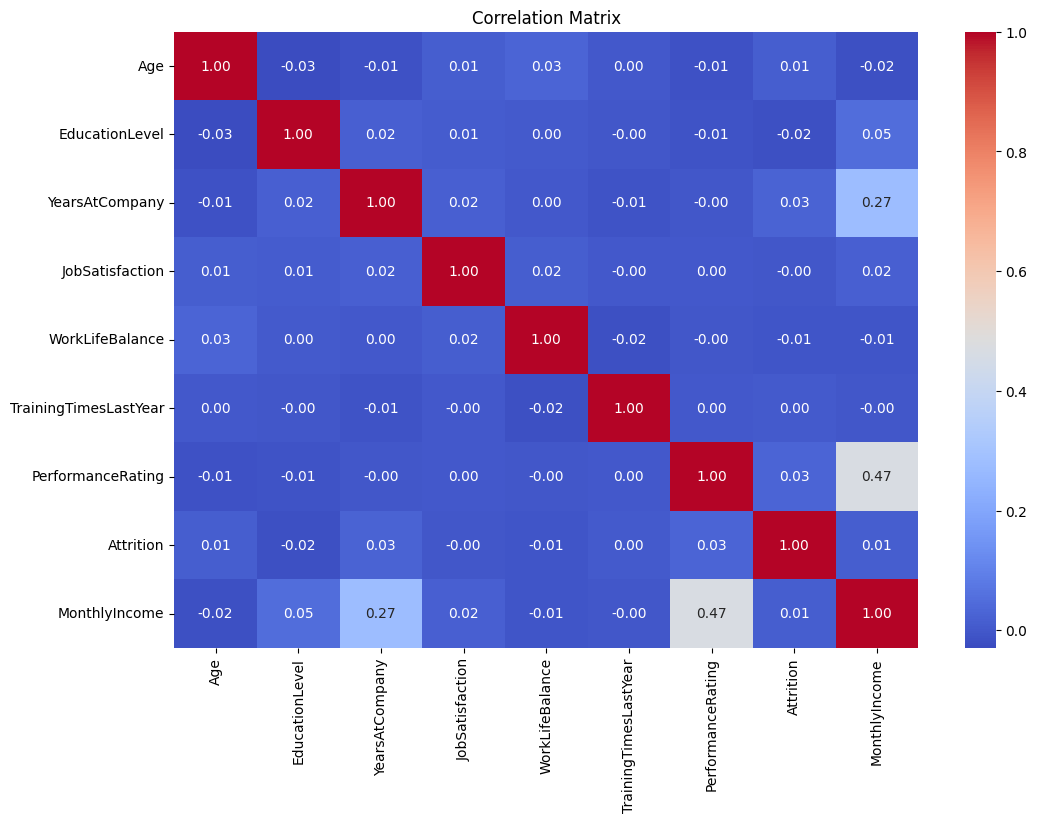

In [32]:
# Adjust figure size for better visualization
plt.figure(figsize=(12, 8))  # Adjust the size as needed
correlation_matrix = df.corr(numeric_only=True)

# Create the heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', annot_kws={'size': 10})

# Add title and show plot
plt.title("Correlation Matrix")
plt.show()


# Employee Correlation Analysis Report

## This correlation matrix visualization presents the relationships between various employee-related variables, offering insights into workforce dynamics and potential patterns in employee characteristics and performance metrics.

## Key Findings

### Strong Correlations (r > 0.4)
- Performance Rating & Monthly Income (0.47)
- Shows clear link between performance and compensation

### Moderate Correlations (0.2 < r < 0.4)
- Years at Company & Monthly Income (0.27)
- Indicates moderate impact of tenure on earnings

### Notable Independence
- Age shows no significant correlation with any variable (all r < |0.03|)
- Education Level has minimal impact (all r < |0.05|)
- Work-Life Balance and Job Satisfaction operate independently

## Core Insights
1. Performance is the strongest driver of income
2. Tenure has moderate influence on compensation
3. Most variables operate independently
4. Traditional factors (age, education) show surprisingly little impact